# Version 10: DNN with Keras --- no dp steps



ML method: DNN

reg = 0.002

### kaggle socore 

## Setup

In [1]:
%matplotlib inline

import math, time, random, datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import missingno


from sklearn import preprocessing


# Machine learning pack 1
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
#from catboost import CatBoostClassifier, Pool, cv


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')



# Neural networks
import tensorflow as  tf
import keras

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils

from keras import layers
from keras import regularizers

from keras.callbacks import EarlyStopping

Using TensorFlow backend.


## Loading data



In [11]:
df_train = pd.read_csv('data/df_train_v10.csv')
df_test = pd.read_csv('data/df_test_v10.csv')
gender_submission = pd.read_csv('data/gender_submission.csv')

df_train.head()

,PassengerId,Survived,SibSp,Parch,Isfemale,Age_fill,Fare_fill,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,1,0.0,0,0.741556,0.225126,0,0,1,0,0,1
1,2,1,1,0.0,1,1.291367,2.213478,1,0,0,1,0,0
2,3,1,0,0.0,1,0.879009,0.246086,0,0,1,0,0,1
3,4,1,1,0.0,1,1.188277,1.648853,0,0,1,1,0,0
4,5,0,0,0.0,0,1.188277,0.249967,0,0,1,0,0,1


In [12]:
df_test.head()

,PassengerId,SibSp,Parch,Isfemale,Age_fill,Fare_fill,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,892,0,0.00000,0,1.175411,0.220206,0,1,0,0,0,1
1,893,1,0.00000,1,1.603394,0.196884,0,0,1,0,0,1
2,894,0,0.00000,0,2.116973,0.272473,0,1,0,0,1,0
3,895,0,0.00000,0,0.918622,0.243644,0,0,1,0,0,1
4,896,1,2.54878,1,0.747429,0.345602,0,0,1,0,0,1


## Prepare for ML

In [13]:

X_train = df_train.drop(['Survived', 'PassengerId'], axis=1)
y_train = df_train['Survived']

X_test = df_test.drop(['PassengerId'], axis=1)


In [14]:
X_train.head()

,SibSp,Parch,Isfemale,Age_fill,Fare_fill,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,0,0.741556,0.225126,0,0,1,0,0,1
1,1,0.0,1,1.291367,2.213478,1,0,0,1,0,0
2,0,0.0,1,0.879009,0.246086,0,0,1,0,0,1
3,1,0.0,1,1.188277,1.648853,0,0,1,1,0,0
4,0,0.0,0,1.188277,0.249967,0,0,1,0,0,1


In [15]:
X_train.shape

(891, 11)

In [16]:
X_train.dtypes

SibSp           int64
Parch         float64
Isfemale        int64
Age_fill      float64
Fare_fill     float64
Embarked_C      int64
Embarked_Q      int64
Embarked_S      int64
Pclass_1        int64
Pclass_2        int64
Pclass_3        int64
dtype: object

# create model with keras

In [17]:


def get_model():

    model = Sequential()
    model.add(layers.Dense(128,  kernel_regularizer=regularizers.l2(0.002), activation="relu",input_dim=X_train.shape[1]))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(64,  kernel_regularizer=regularizers.l2(0.002), activation="relu"))    
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(16,  kernel_regularizer=regularizers.l2(0.002), activation="relu"))    
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(output_dim=1, activation="sigmoid"))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model



In [18]:
model = get_model()

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1536      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                1040      
_________________________________________________________________
dropout_3 (Dropout)  

In [19]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_train, y_train, test_size=0.1)

early_stopping_monitor = EarlyStopping(patience=15)

model = get_model()
_= model.fit(X_train_, y_train_, 
            batch_size = 128,
            epochs=200,
            verbose=1, 
            validation_data = (X_test_, y_test_)
            )
    
print(model.evaluate(X_test_, y_test_))

Instructions for updating:
Use tf.cast instead.
Train on 801 samples, validate on 90 samples
Epoch 1/200
801/801 [==============================] - 4s 4ms/step - loss: 0.9613 - acc: 0.5218 - val_loss: 0.8776 - val_acc: 0.7556
Epoch 2/200
801/801 [==============================] - 0s 55us/step - loss: 0.9038 - acc: 0.6467 - val_loss: 0.8305 - val_acc: 0.7444
Epoch 3/200
801/801 [==============================] - 0s 41us/step - loss: 0.8711 - acc: 0.6442 - val_loss: 0.7700 - val_acc: 0.7556
Epoch 4/200
801/801 [==============================] - 0s 42us/step - loss: 0.8270 - acc: 0.6804 - val_loss: 0.7185 - val_acc: 0.7667
Epoch 5/200
801/801 [==============================] - 0s 40us/step - loss: 0.8075 - acc: 0.6941 - val_loss: 0.6804 - val_acc: 0.8000
Epoch 6/200
801/801 [==============================] - 0s 37us/step - loss: 0.7797 - acc: 0.7216 - val_loss: 0.6484 - val_acc: 0.8222
Epoch 7/200
801/801 [==============================] - 0s 39us/step - loss: 0.7418 - acc: 0.7503 - val_l

801/801 [==============================] - 0s 37us/step - loss: 0.5005 - acc: 0.8190 - val_loss: 0.4305 - val_acc: 0.8444
Epoch 60/200
801/801 [==============================] - 0s 36us/step - loss: 0.5051 - acc: 0.8090 - val_loss: 0.4150 - val_acc: 0.8444
Epoch 61/200
801/801 [==============================] - 0s 36us/step - loss: 0.4957 - acc: 0.8102 - val_loss: 0.4140 - val_acc: 0.8778
Epoch 62/200
801/801 [==============================] - 0s 35us/step - loss: 0.4963 - acc: 0.8202 - val_loss: 0.4244 - val_acc: 0.8778
Epoch 63/200
801/801 [==============================] - 0s 35us/step - loss: 0.4895 - acc: 0.8177 - val_loss: 0.4232 - val_acc: 0.8778
Epoch 64/200
801/801 [==============================] - 0s 36us/step - loss: 0.4734 - acc: 0.8277 - val_loss: 0.4186 - val_acc: 0.8556
Epoch 65/200
801/801 [==============================] - 0s 35us/step - loss: 0.4985 - acc: 0.8140 - val_loss: 0.4172 - val_acc: 0.8556
Epoch 66/200
801/801 [==============================] - 0s 36us/step

801/801 [==============================] - 0s 35us/step - loss: 0.4397 - acc: 0.8439 - val_loss: 0.3921 - val_acc: 0.8667
Epoch 120/200
801/801 [==============================] - 0s 32us/step - loss: 0.4435 - acc: 0.8439 - val_loss: 0.3772 - val_acc: 0.8889
Epoch 121/200
801/801 [==============================] - 0s 36us/step - loss: 0.4457 - acc: 0.8427 - val_loss: 0.3843 - val_acc: 0.8778
Epoch 122/200
801/801 [==============================] - 0s 34us/step - loss: 0.4464 - acc: 0.8464 - val_loss: 0.3815 - val_acc: 0.8778
Epoch 123/200
801/801 [==============================] - 0s 37us/step - loss: 0.4460 - acc: 0.8377 - val_loss: 0.3875 - val_acc: 0.8556
Epoch 124/200
801/801 [==============================] - 0s 36us/step - loss: 0.4392 - acc: 0.8390 - val_loss: 0.3793 - val_acc: 0.8667
Epoch 125/200
801/801 [==============================] - 0s 37us/step - loss: 0.4548 - acc: 0.8277 - val_loss: 0.3903 - val_acc: 0.8667
Epoch 126/200
801/801 [==============================] - 0s 35

801/801 [==============================] - 0s 40us/step - loss: 0.4289 - acc: 0.8365 - val_loss: 0.4049 - val_acc: 0.8444
Epoch 180/200
801/801 [==============================] - 0s 44us/step - loss: 0.4324 - acc: 0.8439 - val_loss: 0.3799 - val_acc: 0.8778
Epoch 181/200
801/801 [==============================] - 0s 42us/step - loss: 0.4280 - acc: 0.8402 - val_loss: 0.3712 - val_acc: 0.8778
Epoch 182/200
801/801 [==============================] - 0s 44us/step - loss: 0.4283 - acc: 0.8452 - val_loss: 0.3974 - val_acc: 0.8889
Epoch 183/200
801/801 [==============================] - 0s 46us/step - loss: 0.4259 - acc: 0.8464 - val_loss: 0.3758 - val_acc: 0.8667
Epoch 184/200
801/801 [==============================] - 0s 39us/step - loss: 0.4187 - acc: 0.8439 - val_loss: 0.3751 - val_acc: 0.8778
Epoch 185/200
801/801 [==============================] - 0s 45us/step - loss: 0.4244 - acc: 0.8477 - val_loss: 0.3843 - val_acc: 0.8778
Epoch 186/200
801/801 [==============================] - 0s 47

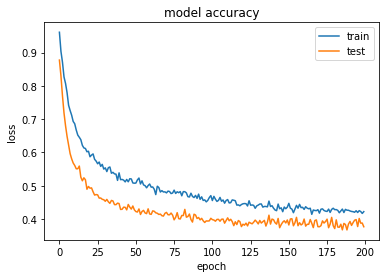

loss: 0.377   


In [20]:
plt.plot(_.history['loss'])
plt.plot(_.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

print("loss: {0:.3f}   ".format(_.history['val_loss'][-1]))

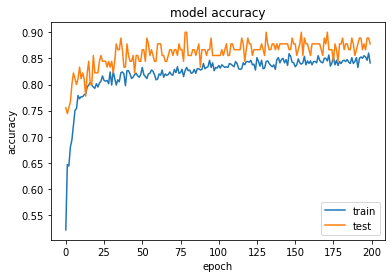

Acc: 0.8778  


In [21]:
plt.plot(_.history['acc'])
plt.plot(_.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

print("Acc: {0:.4f}  ".format(_.history['val_acc'][-1],))

## comment

drop out causes the gap of the loss, since drop wasn't used in validation

## cross-validation

In [22]:
start_time = time.time()
scores=[]
k_fold=10

for i in range(k_fold):
    X_train_, X_test_, y_train_, y_test_ = train_test_split(X_train, y_train, test_size=0.1)
    
    model = get_model()

    model.fit(X_train_.values, y_train_, batch_size=128, epochs=200, verbose=0)

    score  = model.evaluate(X_test_.values, y_test_, verbose=0)
    
    print("acc_cv: {acc:.4f} ".format(acc=score[1]))
    
    scores.append(score[1])

run_time = (time.time() - start_time)



acc_cv: 0.7556 
acc_cv: 0.8000 
acc_cv: 0.8222 
acc_cv: 0.8111 
acc_cv: 0.8333 
acc_cv: 0.8000 
acc_cv: 0.8556 
acc_cv: 0.8111 
acc_cv: 0.8333 
acc_cv: 0.8333 


In [23]:
print("\nacc_cv {0}-Fold: {acc_cv:.4f} +/- {std:.3f} ".format(k_fold, acc_cv=np.mean(scores), std=np.std(scores)))
#print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))
print("\nRunning Time: {}".format(datetime.timedelta(seconds=run_time)))


acc_cv 10-Fold: 0.8156 +/- 0.026 

Running Time: 0:01:19.461160


## final run 

In [24]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_train, y_train, test_size=0.1)

early_stopping_monitor = EarlyStopping(patience=15)

model = get_model()
_= model.fit(X_train_, y_train_, 
            batch_size = 128,
            epochs=200,
            verbose=1, 
            validation_data = (X_test_, y_test_) 
            )
    


Train on 801 samples, validate on 90 samples
Epoch 1/200
801/801 [==============================] - 2s 3ms/step - loss: 0.9432 - acc: 0.5830 - val_loss: 0.8950 - val_acc: 0.6778
Epoch 2/200
801/801 [==============================] - 0s 39us/step - loss: 0.8981 - acc: 0.6529 - val_loss: 0.8542 - val_acc: 0.7222
Epoch 3/200
801/801 [==============================] - 0s 39us/step - loss: 0.8629 - acc: 0.6729 - val_loss: 0.8131 - val_acc: 0.7000
Epoch 4/200
801/801 [==============================] - 0s 39us/step - loss: 0.8230 - acc: 0.7066 - val_loss: 0.7761 - val_acc: 0.7222
Epoch 5/200
801/801 [==============================] - 0s 39us/step - loss: 0.7858 - acc: 0.7316 - val_loss: 0.7387 - val_acc: 0.7222
Epoch 6/200
801/801 [==============================] - 0s 39us/step - loss: 0.7490 - acc: 0.7453 - val_loss: 0.7043 - val_acc: 0.7778
Epoch 7/200
801/801 [==============================] - 0s 39us/step - loss: 0.7318 - acc: 0.7541 - val_loss: 0.6715 - val_acc: 0.8111
Epoch 8/200
801/80

801/801 [==============================] - 0s 42us/step - loss: 0.4900 - acc: 0.8215 - val_loss: 0.4516 - val_acc: 0.8333
Epoch 62/200
801/801 [==============================] - 0s 44us/step - loss: 0.4843 - acc: 0.8177 - val_loss: 0.4454 - val_acc: 0.8556
Epoch 63/200
801/801 [==============================] - 0s 44us/step - loss: 0.4885 - acc: 0.8277 - val_loss: 0.4460 - val_acc: 0.8444
Epoch 64/200
801/801 [==============================] - 0s 42us/step - loss: 0.4860 - acc: 0.8265 - val_loss: 0.4456 - val_acc: 0.8444
Epoch 65/200
801/801 [==============================] - 0s 44us/step - loss: 0.4901 - acc: 0.8152 - val_loss: 0.4564 - val_acc: 0.8222
Epoch 66/200
801/801 [==============================] - 0s 41us/step - loss: 0.4746 - acc: 0.8227 - val_loss: 0.4594 - val_acc: 0.8222
Epoch 67/200
801/801 [==============================] - 0s 41us/step - loss: 0.4868 - acc: 0.8202 - val_loss: 0.4500 - val_acc: 0.8444
Epoch 68/200
801/801 [==============================] - 0s 28us/step

801/801 [==============================] - 0s 42us/step - loss: 0.4478 - acc: 0.8315 - val_loss: 0.4410 - val_acc: 0.8444
Epoch 122/200
801/801 [==============================] - 0s 40us/step - loss: 0.4440 - acc: 0.8377 - val_loss: 0.4456 - val_acc: 0.8111
Epoch 123/200
801/801 [==============================] - 0s 44us/step - loss: 0.4330 - acc: 0.8377 - val_loss: 0.4467 - val_acc: 0.8222
Epoch 124/200
801/801 [==============================] - 0s 44us/step - loss: 0.4461 - acc: 0.8327 - val_loss: 0.4410 - val_acc: 0.8222
Epoch 125/200
801/801 [==============================] - 0s 42us/step - loss: 0.4379 - acc: 0.8340 - val_loss: 0.4332 - val_acc: 0.8556
Epoch 126/200
801/801 [==============================] - 0s 42us/step - loss: 0.4434 - acc: 0.8464 - val_loss: 0.4425 - val_acc: 0.8000
Epoch 127/200
801/801 [==============================] - 0s 40us/step - loss: 0.4388 - acc: 0.8452 - val_loss: 0.4440 - val_acc: 0.8111
Epoch 128/200
801/801 [==============================] - 0s 42

801/801 [==============================] - 0s 39us/step - loss: 0.4204 - acc: 0.8589 - val_loss: 0.4364 - val_acc: 0.8222
Epoch 182/200
801/801 [==============================] - 0s 39us/step - loss: 0.4191 - acc: 0.8377 - val_loss: 0.4277 - val_acc: 0.8444
Epoch 183/200
801/801 [==============================] - 0s 39us/step - loss: 0.4210 - acc: 0.8427 - val_loss: 0.4557 - val_acc: 0.8000
Epoch 184/200
801/801 [==============================] - 0s 39us/step - loss: 0.4122 - acc: 0.8589 - val_loss: 0.4355 - val_acc: 0.8333
Epoch 185/200
801/801 [==============================] - 0s 39us/step - loss: 0.4224 - acc: 0.8527 - val_loss: 0.4271 - val_acc: 0.8444
Epoch 186/200
801/801 [==============================] - 0s 39us/step - loss: 0.4217 - acc: 0.8527 - val_loss: 0.4474 - val_acc: 0.8000
Epoch 187/200
801/801 [==============================] - 0s 39us/step - loss: 0.4134 - acc: 0.8577 - val_loss: 0.4300 - val_acc: 0.8333
Epoch 188/200
801/801 [==============================] - 0s 39

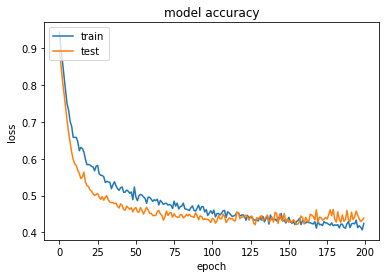

loss: 0.4387   


In [25]:
plt.plot(_.history['loss'])
plt.plot(_.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("loss: {0:.4f}   ".format(_.history['val_loss'][-1]))

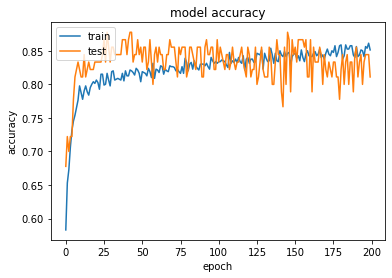

Acc: 0.8111  


In [26]:
plt.plot(_.history['acc'])
plt.plot(_.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("Acc: {0:.4f}  ".format(_.history['val_acc'][-1],))

## Feature Importance

## Prediction and Submission
make the prediction on the test dataset and submit the cvs file to kaggle.

In [27]:
X_test.head(10)

,SibSp,Parch,Isfemale,Age_fill,Fare_fill,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,0.00000,0,1.175411,0.220206,0,1,0,0,0,1
1,1,0.00000,1,1.603394,0.196884,0,0,1,0,0,1
2,0,0.00000,0,2.116973,0.272473,0,1,0,0,1,0
3,0,0.00000,0,0.918622,0.243644,0,0,1,0,0,1
4,1,2.54878,1,0.747429,0.345602,0,0,1,0,0,1
5,0,0.00000,0,0.473520,0.259465,0,0,1,0,0,1
6,0,0.00000,1,1.021338,0.214581,0,1,0,0,0,1
7,1,2.54878,0,0.884383,0.815663,0,0,1,0,1,0
8,0,0.00000,1,0.610474,0.203331,1,0,0,0,0,1
9,2,0.00000,0,0.713190,0.679250,0,0,1,0,0,1


In [28]:
# Make a prediction using the CatBoost model on the wanted columns
pred  = model.predict(X_test)

In [29]:
pred[:10]

array([[0.05998766],
       [0.39054614],
       [0.04265866],
       [0.10755566],
       [0.42066553],
       [0.11887991],
       [0.8216469 ],
       [0.19755852],
       [0.5811043 ],
       [0.09508768]], dtype=float32)

In [30]:
predictions = np.rint(pred.reshape([pred.shape[0]]))

In [31]:
predictions

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [32]:

output = pd.DataFrame({ 'PassengerId' : df_test['PassengerId'], 'Survived': predictions.astype(int) })

output.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [33]:
#output.to_csv('data/sub_titanic_10_dnn.csv', index = False)